In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

/home/anuj_dutt_ml/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Load Dataset
fashion_mnist = input_data.read_data_sets('./dataset/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/train-labels-idx1-ubyte.gz
Extracting ./dataset/t10k-images-idx3-ubyte.gz
Extracting ./dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Function to Process Images into Right Format
def process_data(data=None):
    return data.images, data.labels.astype(np.int32)

In [4]:
# Load Training Data
X, y = process_data(data=fashion_mnist.train)[0], process_data(data=fashion_mnist.train)[1]

In [5]:
# Load Test Data
X_test, y_test = process_data(data=fashion_mnist.test)[0], process_data(data=fashion_mnist.test)[1]

In [6]:
X.shape, y.shape

((55000, 784), (55000,))

In [7]:
# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((44000, 784), (44000,), (11000, 784), (11000,))

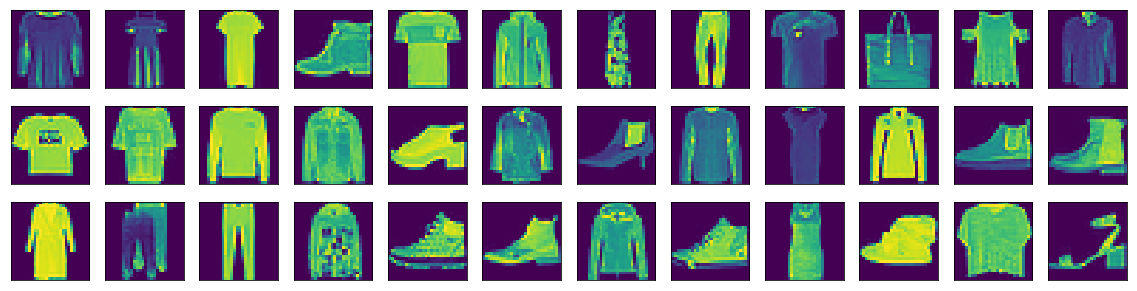

In [8]:
# Plot some images from Dataset
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i].reshape(28,28)))

In [9]:
# Define Feature Column
feat_cols = [tf.feature_column.numeric_column('x', shape=[28,28])]

In [10]:
# Define Training Input
train_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_train}, y=y_train, num_epochs=None, batch_size=50, shuffle=True)

In [11]:
# DNN Classifier Model
dnn_model = tf.estimator.DNNClassifier(feature_columns=feat_cols, hidden_units=[256, 32], optimizer=tf.train.AdamOptimizer(1e-4), n_classes=10, dropout=0.1, model_dir='./mnist_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': './mnist_model', '_is_chief': True, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7ff48d16a0>, '_task_type': 'worker', '_task_id': 0, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_global_id_in_cluster': 0, '_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_evaluation_master': '', '_save_summary_steps': 100, '_session_config': None}


In [12]:
# Training the Model
dnn_model.train(input_fn=train_input, steps=100000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-114000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114001 into ./mnist_model/model.ckpt.
INFO:tensorflow:loss = 2.6095717, step = 114000
INFO:tensorflow:global_step/sec: 347.687
INFO:tensorflow:loss = 2.70942, step = 114100 (0.289 sec)
INFO:tensorflow:global_step/sec: 453.534
INFO:tensorflow:loss = 0.7680096, step = 114200 (0.220 sec)
INFO:tensorflow:global_step/sec: 462.963
INFO:tensorflow:loss = 0.98304087, step = 114300 (0.217 sec)
INFO:tensorflow:global_step/sec: 453.793
INFO:tensorflow:loss = 3.639397, step = 114400 (0.220 sec)
INFO:tensorflow:global_step/sec: 454.944
INFO:tensorflow:loss = 0.4952197, step = 114500 (0.220 sec)
INFO:tensorflow:global_step/sec: 450.107
INFO:tensorflow:loss

INFO:tensorflow:loss = 2.7688828, step = 121800 (0.221 sec)
INFO:tensorflow:global_step/sec: 447.824
INFO:tensorflow:loss = 4.252928, step = 121900 (0.223 sec)
INFO:tensorflow:global_step/sec: 454.357
INFO:tensorflow:loss = 0.4447654, step = 122000 (0.220 sec)
INFO:tensorflow:global_step/sec: 456.264
INFO:tensorflow:loss = 0.5774358, step = 122100 (0.219 sec)
INFO:tensorflow:global_step/sec: 453.159
INFO:tensorflow:loss = 0.41664237, step = 122200 (0.221 sec)
INFO:tensorflow:global_step/sec: 459.674
INFO:tensorflow:loss = 1.8242049, step = 122300 (0.217 sec)
INFO:tensorflow:global_step/sec: 456.902
INFO:tensorflow:loss = 1.3056508, step = 122400 (0.219 sec)
INFO:tensorflow:global_step/sec: 466.382
INFO:tensorflow:loss = 1.3441689, step = 122500 (0.214 sec)
INFO:tensorflow:global_step/sec: 460.106
INFO:tensorflow:loss = 2.525901, step = 122600 (0.217 sec)
INFO:tensorflow:global_step/sec: 471.423
INFO:tensorflow:loss = 2.5757315, step = 122700 (0.212 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 452.289
INFO:tensorflow:loss = 0.55316705, step = 130000 (0.221 sec)
INFO:tensorflow:global_step/sec: 441.196
INFO:tensorflow:loss = 3.1255267, step = 130100 (0.227 sec)
INFO:tensorflow:global_step/sec: 454.662
INFO:tensorflow:loss = 4.751957, step = 130200 (0.220 sec)
INFO:tensorflow:global_step/sec: 457.225
INFO:tensorflow:loss = 0.75766337, step = 130300 (0.219 sec)
INFO:tensorflow:global_step/sec: 443.002
INFO:tensorflow:loss = 2.3663268, step = 130400 (0.226 sec)
INFO:tensorflow:global_step/sec: 443.425
INFO:tensorflow:loss = 0.9338449, step = 130500 (0.226 sec)
INFO:tensorflow:global_step/sec: 450.863
INFO:tensorflow:loss = 2.8750467, step = 130600 (0.222 sec)
INFO:tensorflow:global_step/sec: 455.282
INFO:tensorflow:loss = 1.923276, step = 130700 (0.220 sec)
INFO:tensorflow:global_step/sec: 454.057
INFO:tensorflow:loss = 2.323947, step = 130800 (0.220 sec)
INFO:tensorflow:global_step/sec: 461.107
INFO:tensorflow:loss = 3.8627222, step = 130900 (0.

INFO:tensorflow:loss = 1.1730444, step = 138100 (0.225 sec)
INFO:tensorflow:global_step/sec: 447.435
INFO:tensorflow:loss = 3.017927, step = 138200 (0.223 sec)
INFO:tensorflow:global_step/sec: 446.621
INFO:tensorflow:loss = 2.898311, step = 138300 (0.224 sec)
INFO:tensorflow:global_step/sec: 447.645
INFO:tensorflow:loss = 0.6619725, step = 138400 (0.223 sec)
INFO:tensorflow:global_step/sec: 450.795
INFO:tensorflow:loss = 0.7246633, step = 138500 (0.222 sec)
INFO:tensorflow:global_step/sec: 457.294
INFO:tensorflow:loss = 5.4398003, step = 138600 (0.219 sec)
INFO:tensorflow:global_step/sec: 441.323
INFO:tensorflow:loss = 1.8556007, step = 138700 (0.227 sec)
INFO:tensorflow:global_step/sec: 440.787
INFO:tensorflow:loss = 4.147208, step = 138800 (0.227 sec)
INFO:tensorflow:global_step/sec: 446.369
INFO:tensorflow:loss = 4.2174835, step = 138900 (0.224 sec)
INFO:tensorflow:global_step/sec: 448.223
INFO:tensorflow:loss = 5.3158703, step = 139000 (0.223 sec)
INFO:tensorflow:global_step/sec: 4

INFO:tensorflow:global_step/sec: 451.082
INFO:tensorflow:loss = 8.779389, step = 146300 (0.221 sec)
INFO:tensorflow:global_step/sec: 454.558
INFO:tensorflow:loss = 5.352727, step = 146400 (0.220 sec)
INFO:tensorflow:global_step/sec: 450.302
INFO:tensorflow:loss = 2.0611188, step = 146500 (0.222 sec)
INFO:tensorflow:global_step/sec: 448.158
INFO:tensorflow:loss = 0.49991286, step = 146600 (0.223 sec)
INFO:tensorflow:global_step/sec: 445.345
INFO:tensorflow:loss = 1.2912993, step = 146700 (0.224 sec)
INFO:tensorflow:global_step/sec: 452.162
INFO:tensorflow:loss = 5.6689043, step = 146800 (0.221 sec)
INFO:tensorflow:global_step/sec: 453.261
INFO:tensorflow:loss = 3.753251, step = 146900 (0.221 sec)
INFO:tensorflow:global_step/sec: 462.128
INFO:tensorflow:loss = 0.95021296, step = 147000 (0.216 sec)
INFO:tensorflow:global_step/sec: 456.933
INFO:tensorflow:loss = 0.81594306, step = 147100 (0.219 sec)
INFO:tensorflow:global_step/sec: 457.535
INFO:tensorflow:loss = 2.5971758, step = 147200 (0

INFO:tensorflow:loss = 6.197094, step = 154400 (0.220 sec)
INFO:tensorflow:global_step/sec: 458.817
INFO:tensorflow:loss = 0.43537715, step = 154500 (0.218 sec)
INFO:tensorflow:global_step/sec: 459.09
INFO:tensorflow:loss = 0.46488273, step = 154600 (0.218 sec)
INFO:tensorflow:global_step/sec: 442.896
INFO:tensorflow:loss = 2.9282966, step = 154700 (0.226 sec)
INFO:tensorflow:global_step/sec: 449.422
INFO:tensorflow:loss = 2.4627106, step = 154800 (0.222 sec)
INFO:tensorflow:global_step/sec: 456.23
INFO:tensorflow:loss = 2.3998985, step = 154900 (0.219 sec)
INFO:tensorflow:global_step/sec: 456.848
INFO:tensorflow:loss = 1.9605942, step = 155000 (0.219 sec)
INFO:tensorflow:global_step/sec: 454.439
INFO:tensorflow:loss = 0.50612825, step = 155100 (0.220 sec)
INFO:tensorflow:global_step/sec: 449.836
INFO:tensorflow:loss = 1.1839029, step = 155200 (0.222 sec)
INFO:tensorflow:global_step/sec: 448.777
INFO:tensorflow:loss = 0.3262173, step = 155300 (0.223 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 457.435
INFO:tensorflow:loss = 3.9353511, step = 162600 (0.219 sec)
INFO:tensorflow:global_step/sec: 462.203
INFO:tensorflow:loss = 2.3665504, step = 162700 (0.217 sec)
INFO:tensorflow:global_step/sec: 457.297
INFO:tensorflow:loss = 2.5226202, step = 162800 (0.218 sec)
INFO:tensorflow:global_step/sec: 457.757
INFO:tensorflow:loss = 1.8652968, step = 162900 (0.219 sec)
INFO:tensorflow:global_step/sec: 451.997
INFO:tensorflow:loss = 4.226702, step = 163000 (0.221 sec)
INFO:tensorflow:global_step/sec: 462.016
INFO:tensorflow:loss = 5.5162635, step = 163100 (0.216 sec)
INFO:tensorflow:global_step/sec: 461.896
INFO:tensorflow:loss = 0.6320316, step = 163200 (0.217 sec)
INFO:tensorflow:global_step/sec: 454.485
INFO:tensorflow:loss = 1.045119, step = 163300 (0.220 sec)
INFO:tensorflow:global_step/sec: 463.963
INFO:tensorflow:loss = 1.9496026, step = 163400 (0.215 sec)
INFO:tensorflow:global_step/sec: 456.313
INFO:tensorflow:loss = 1.2238493, step = 163500 (0.2

INFO:tensorflow:loss = 1.1377887, step = 170700 (0.224 sec)
INFO:tensorflow:global_step/sec: 439.965
INFO:tensorflow:loss = 0.53256583, step = 170800 (0.227 sec)
INFO:tensorflow:global_step/sec: 455.171
INFO:tensorflow:loss = 1.1933577, step = 170900 (0.220 sec)
INFO:tensorflow:global_step/sec: 444.478
INFO:tensorflow:loss = 0.8004132, step = 171000 (0.225 sec)
INFO:tensorflow:global_step/sec: 455.172
INFO:tensorflow:loss = 4.16468, step = 171100 (0.220 sec)
INFO:tensorflow:global_step/sec: 452.939
INFO:tensorflow:loss = 2.0078504, step = 171200 (0.221 sec)
INFO:tensorflow:global_step/sec: 459.497
INFO:tensorflow:loss = 3.5957, step = 171300 (0.218 sec)
INFO:tensorflow:global_step/sec: 448.76
INFO:tensorflow:loss = 0.6718743, step = 171400 (0.223 sec)
INFO:tensorflow:global_step/sec: 464.433
INFO:tensorflow:loss = 0.16239813, step = 171500 (0.215 sec)
INFO:tensorflow:global_step/sec: 459.662
INFO:tensorflow:loss = 4.2154374, step = 171600 (0.218 sec)
INFO:tensorflow:global_step/sec: 45

INFO:tensorflow:global_step/sec: 456.858
INFO:tensorflow:loss = 1.7416451, step = 178900 (0.219 sec)
INFO:tensorflow:global_step/sec: 454.058
INFO:tensorflow:loss = 3.0590825, step = 179000 (0.220 sec)
INFO:tensorflow:global_step/sec: 447.199
INFO:tensorflow:loss = 5.506747, step = 179100 (0.223 sec)
INFO:tensorflow:global_step/sec: 448.716
INFO:tensorflow:loss = 1.2177094, step = 179200 (0.223 sec)
INFO:tensorflow:global_step/sec: 449.77
INFO:tensorflow:loss = 4.8197765, step = 179300 (0.222 sec)
INFO:tensorflow:global_step/sec: 458.114
INFO:tensorflow:loss = 1.2869853, step = 179400 (0.218 sec)
INFO:tensorflow:global_step/sec: 455.578
INFO:tensorflow:loss = 1.4632648, step = 179500 (0.219 sec)
INFO:tensorflow:global_step/sec: 453.315
INFO:tensorflow:loss = 4.7819185, step = 179600 (0.221 sec)
INFO:tensorflow:global_step/sec: 439.907
INFO:tensorflow:loss = 1.4524884, step = 179700 (0.228 sec)
INFO:tensorflow:global_step/sec: 445.798
INFO:tensorflow:loss = 0.9385728, step = 179800 (0.2

INFO:tensorflow:loss = 0.6156781, step = 187000 (0.217 sec)
INFO:tensorflow:global_step/sec: 468.354
INFO:tensorflow:loss = 2.674118, step = 187100 (0.213 sec)
INFO:tensorflow:global_step/sec: 456.462
INFO:tensorflow:loss = 0.24537216, step = 187200 (0.219 sec)
INFO:tensorflow:global_step/sec: 449.787
INFO:tensorflow:loss = 1.8766276, step = 187300 (0.222 sec)
INFO:tensorflow:global_step/sec: 453.802
INFO:tensorflow:loss = 2.7919016, step = 187400 (0.220 sec)
INFO:tensorflow:global_step/sec: 458.635
INFO:tensorflow:loss = 3.8180797, step = 187500 (0.218 sec)
INFO:tensorflow:global_step/sec: 443.019
INFO:tensorflow:loss = 1.5939883, step = 187600 (0.226 sec)
INFO:tensorflow:global_step/sec: 457.863
INFO:tensorflow:loss = 5.4155807, step = 187700 (0.218 sec)
INFO:tensorflow:global_step/sec: 448.383
INFO:tensorflow:loss = 0.019568544, step = 187800 (0.223 sec)
INFO:tensorflow:global_step/sec: 455.756
INFO:tensorflow:loss = 0.8479371, step = 187900 (0.219 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 448.689
INFO:tensorflow:loss = 2.647728, step = 195200 (0.223 sec)
INFO:tensorflow:global_step/sec: 453.433
INFO:tensorflow:loss = 0.24937698, step = 195300 (0.220 sec)
INFO:tensorflow:global_step/sec: 457.72
INFO:tensorflow:loss = 3.445078, step = 195400 (0.219 sec)
INFO:tensorflow:global_step/sec: 461.92
INFO:tensorflow:loss = 2.287363, step = 195500 (0.216 sec)
INFO:tensorflow:global_step/sec: 444.68
INFO:tensorflow:loss = 0.72653985, step = 195600 (0.225 sec)
INFO:tensorflow:global_step/sec: 449.348
INFO:tensorflow:loss = 1.2792039, step = 195700 (0.223 sec)
INFO:tensorflow:global_step/sec: 443.15
INFO:tensorflow:loss = 1.5359722, step = 195800 (0.226 sec)
INFO:tensorflow:global_step/sec: 447.161
INFO:tensorflow:loss = 2.4185035, step = 195900 (0.224 sec)
INFO:tensorflow:global_step/sec: 453.221
INFO:tensorflow:loss = 1.9333425, step = 196000 (0.221 sec)
INFO:tensorflow:global_step/sec: 457.634
INFO:tensorflow:loss = 0.71512306, step = 196100 (0.218

INFO:tensorflow:loss = 1.555636, step = 203300 (0.220 sec)
INFO:tensorflow:global_step/sec: 462.637
INFO:tensorflow:loss = 1.2686026, step = 203400 (0.216 sec)
INFO:tensorflow:global_step/sec: 459.734
INFO:tensorflow:loss = 0.48198387, step = 203500 (0.217 sec)
INFO:tensorflow:global_step/sec: 452.354
INFO:tensorflow:loss = 1.0996035, step = 203600 (0.221 sec)
INFO:tensorflow:global_step/sec: 455.006
INFO:tensorflow:loss = 0.30597278, step = 203700 (0.221 sec)
INFO:tensorflow:global_step/sec: 456.109
INFO:tensorflow:loss = 0.3545472, step = 203800 (0.218 sec)
INFO:tensorflow:global_step/sec: 451.101
INFO:tensorflow:loss = 4.738115, step = 203900 (0.222 sec)
INFO:tensorflow:global_step/sec: 462.385
INFO:tensorflow:loss = 0.5230566, step = 204000 (0.217 sec)
INFO:tensorflow:global_step/sec: 455.384
INFO:tensorflow:loss = 0.31847927, step = 204100 (0.219 sec)
INFO:tensorflow:global_step/sec: 460.86
INFO:tensorflow:loss = 1.0074121, step = 204200 (0.217 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 448.053
INFO:tensorflow:loss = 7.2713585, step = 211500 (0.223 sec)
INFO:tensorflow:global_step/sec: 456.01
INFO:tensorflow:loss = 0.23846434, step = 211600 (0.219 sec)
INFO:tensorflow:global_step/sec: 454.12
INFO:tensorflow:loss = 5.331482, step = 211700 (0.220 sec)
INFO:tensorflow:global_step/sec: 454.822
INFO:tensorflow:loss = 0.2521376, step = 211800 (0.220 sec)
INFO:tensorflow:global_step/sec: 462.334
INFO:tensorflow:loss = 2.2214205, step = 211900 (0.217 sec)
INFO:tensorflow:global_step/sec: 447.784
INFO:tensorflow:loss = 0.572721, step = 212000 (0.223 sec)
INFO:tensorflow:global_step/sec: 463.558
INFO:tensorflow:loss = 0.6046065, step = 212100 (0.216 sec)
INFO:tensorflow:global_step/sec: 450.427
INFO:tensorflow:loss = 3.006933, step = 212200 (0.222 sec)
INFO:tensorflow:global_step/sec: 451.454
INFO:tensorflow:loss = 0.11459483, step = 212300 (0.221 sec)
INFO:tensorflow:global_step/sec: 444.848
INFO:tensorflow:loss = 0.41705298, step = 212400 (0.2

In [13]:
# Validation/Evaluation Input
eval_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_val}, y=y_val, num_epochs=1000, batch_size=20, shuffle=False)

In [14]:
# Validate the Model Performance
dnn_model.evaluate(input_fn=eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-06-23:59:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-214000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-00:17:34
INFO:tensorflow:Saving dict for global step 214000: accuracy = 0.8957273, average_loss = 0.59038883, global_step = 214000, loss = 11.807776


{'accuracy': 0.8957273,
 'average_loss': 0.59038883,
 'global_step': 214000,
 'loss': 11.807776}

In [15]:
# Test Input
test_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_test}, y=y_test, num_epochs=1, batch_size=10, shuffle=False)

In [26]:
# Predict Labels for Test Data
y_pred = dnn_model.predict(input_fn=test_input)

In [27]:
# List of Predictions
predicted_labels = list(y_pred)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-214000


INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-214000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
predicted_labels

[{'class_ids': array([9]),
  'classes': array([b'9'], dtype=object),
  'logits': array([-18.321157 , -16.191778 , -14.131066 , -14.770831 , -13.975059 ,
          -4.466833 , -25.440226 ,  -2.5131974, -12.091413 ,  12.743316 ],
        dtype=float32),
  'probabilities': array([3.2275357e-14, 2.7142429e-13, 2.1311011e-12, 1.1239780e-12,
         2.4909061e-12, 3.3552713e-08, 2.6127570e-17, 2.3669016e-07,
         1.6383794e-11, 9.9999976e-01], dtype=float32)},
 {'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([ -9.637094 , -16.89979  ,  14.300826 , -21.968124 ,  -5.7614474,
         -25.511105 , -15.260941 , -24.878605 , -18.405424 , -18.353256 ],
        dtype=float32),
  'probabilities': array([4.0169239e-11, 2.8167291e-14, 1.0000000e+00, 1.7725338e-16,
         1.9367141e-09, 5.1274068e-18, 1.4503989e-13, 9.6513680e-18,
         6.2496607e-15, 6.5843335e-15], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  '

In [31]:
for preds in predicted_labels:
    print(preds['probabilities'])

[3.2275357e-14 2.7142429e-13 2.1311011e-12 1.1239780e-12 2.4909061e-12
 3.3552713e-08 2.6127570e-17 2.3669016e-07 1.6383794e-11 9.9999976e-01]
[4.0169239e-11 2.8167291e-14 1.0000000e+00 1.7725338e-16 1.9367141e-09
 5.1274068e-18 1.4503989e-13 9.6513680e-18 6.2496607e-15 6.5843335e-15]
[6.4079399e-27 1.0000000e+00 9.5238231e-36 3.0377544e-22 3.8960003e-16
 1.6611437e-32 3.9774388e-30 4.0145810e-33 3.9684677e-22 2.6716105e-37]
[4.6422772e-24 1.0000000e+00 2.0100165e-30 3.8929843e-16 1.2060266e-17
 1.8088229e-26 2.8704266e-26 5.7941391e-31 1.9524990e-21 4.2041823e-32]
[8.54713260e-04 6.45907481e-14 1.26957458e-10 1.36004086e-09
 6.64782682e-12 1.09315446e-10 9.99145269e-01 3.62583570e-16
 4.61558881e-11 8.73282089e-12]
[3.6263164e-19 1.0000000e+00 8.0294200e-27 3.2282593e-16 6.7085244e-12
 2.3470519e-24 3.3333581e-21 6.1188686e-25 1.7814671e-17 2.6613303e-27]
[2.8796151e-20 2.5505059e-13 3.1308716e-08 7.7228841e-18 1.0000000e+00
 1.7586194e-23 6.9852450e-11 1.2315844e-15 5.2240405e-14 2.6

[5.4665423e-23 1.8990995e-16 3.9235575e-26 8.1531353e-14 7.7130307e-12
 1.1548003e-17 9.9490861e-24 1.0786056e-21 1.0000000e+00 6.9773354e-26]
[6.6269850e-12 1.0891980e-09 2.9986660e-07 1.3247696e-09 9.0108346e-12
 3.1450877e-03 2.3636987e-13 9.9685103e-01 9.2594064e-08 3.5009327e-06]
[3.8239598e-02 1.2556196e-10 2.3373153e-07 1.7760222e-09 3.8066776e-09
 2.6541662e-09 9.6176016e-01 1.8716083e-12 8.6621528e-09 3.8334779e-08]
[1.3862350e-15 4.3930629e-14 6.9089582e-16 4.8263255e-11 7.2019238e-11
 2.8473854e-09 2.3472903e-12 1.0000000e+00 4.1214421e-10 7.7388658e-11]
[2.5919450e-21 5.9294325e-18 2.8245078e-22 1.5339553e-21 3.1098227e-18
 5.5980988e-12 9.9521359e-29 3.8318117e-08 9.4239788e-19 1.0000000e+00]
[4.6375906e-05 9.8771037e-05 2.3762034e-11 9.9759644e-01 2.8050660e-13
 5.7292375e-09 2.2583134e-03 1.5552574e-12 8.0153792e-12 2.9576916e-10]
[3.2453948e-16 8.6769183e-15 1.2194116e-02 5.1780493e-13 9.8780590e-01
 5.1512214e-18 3.0256064e-08 6.7776506e-15 1.1459860e-12 3.8141195e-15]

 4.4718536e-09 9.4124162e-01 4.3423845e-10 7.8273808e-07 1.3380806e-07]
[1.41844335e-22 4.59878868e-19 6.27118420e-28 4.28563136e-17
 4.92139274e-19 2.56343797e-22 3.25891390e-20 1.22991215e-24
 1.00000000e+00 1.80051305e-19]
[3.4366656e-20 1.7317747e-18 7.2412655e-17 5.3370123e-17 2.4425103e-18
 3.2106590e-07 5.1206173e-20 9.9999964e-01 1.7814609e-12 9.0508309e-17]
[1.2169053e-14 4.4137496e-11 4.4812953e-01 2.4418154e-09 5.5187047e-01
 7.4153194e-15 1.5417919e-08 1.2473106e-11 4.0196620e-11 3.3817343e-10]
[9.4613979e-06 2.1961721e-09 2.2460801e-05 2.4856586e-08 5.1605351e-09
 2.8046909e-09 9.9995828e-01 1.6462497e-10 9.7544944e-06 7.2944359e-12]
[1.8989695e-23 1.0000000e+00 1.9090970e-28 8.3581818e-16 6.1346988e-15
 7.4947963e-24 2.8181536e-25 2.3121851e-28 7.7725662e-18 9.0654642e-29]
[1.6433658e-07 1.5854567e-08 9.7664702e-01 3.0605747e-08 3.0874605e-06
 2.0427746e-09 2.3348492e-02 3.1675570e-10 1.2174602e-06 8.3135632e-10]
[1.4001964e-15 4.7784460e-11 3.2623050e-11 3.8845953e-12 4.

[1.2725519e-06 1.4040781e-07 7.0061686e-04 7.7329918e-05 5.6078829e-07
 4.0416248e-06 5.5721973e-04 1.4078580e-07 9.9864906e-01 9.6266676e-06]
[6.0772334e-13 9.7535541e-08 6.4883733e-07 1.2246705e-14 9.9999642e-01
 6.7955696e-16 2.8485313e-06 4.5372313e-13 1.1214089e-08 1.2543852e-17]
[2.5700641e-24 9.5095661e-19 2.5737431e-24 6.4371015e-25 2.9018251e-19
 7.1799847e-13 6.0073194e-33 4.3703066e-10 6.6818266e-22 1.0000000e+00]
[5.6631271e-19 2.1153042e-23 1.1348620e-14 9.1919962e-17 5.2483871e-30
 1.0000000e+00 1.8171007e-19 5.1486833e-14 2.0071892e-15 3.7544549e-18]
[1.3023956e-16 6.3181007e-14 4.1917380e-14 3.4079841e-13 2.6974098e-12
 2.9094394e-08 1.8462337e-15 1.0000000e+00 9.5063041e-11 9.7124409e-10]
[8.7833782e-11 7.5438804e-15 1.6135391e-07 3.2488987e-11 4.7745363e-08
 8.5427806e-14 9.9999988e-01 1.8831724e-14 9.2193579e-12 1.2908116e-16]
[3.7528553e-15 4.1785744e-21 1.2288327e-17 5.1630734e-16 3.7498983e-20
 9.9999964e-01 7.9038836e-18 3.3710077e-07 6.9905410e-09 1.8605226e-14]

[4.8953780e-22 1.6023343e-24 5.9367087e-22 3.8387340e-22 6.6837045e-32
 1.0000000e+00 9.4442594e-30 1.2932917e-15 3.2441722e-16 3.5457558e-14]
[9.1473659e-05 9.6465406e-08 3.0113401e-10 9.9990845e-01 7.3474959e-12
 1.6052686e-08 3.1472014e-10 6.4521766e-16 2.1308589e-11 6.5615197e-14]
[2.1671908e-04 2.4187229e-06 4.0695798e-03 1.4006041e-02 7.6371711e-01
 2.3214969e-05 2.0031257e-01 3.3271816e-04 1.7306618e-02 1.2967604e-05]
[4.3775933e-12 7.6572903e-18 3.9785124e-17 1.2617432e-15 2.8100737e-15
 1.7943639e-14 9.0094173e-12 1.3612162e-18 1.0000000e+00 1.2886491e-13]
[1.9967367e-06 6.5864897e-03 9.6698432e-07 9.9329668e-01 7.7412325e-05
 2.2821571e-06 1.5372290e-06 9.5151478e-08 3.1802363e-05 7.3530902e-07]
[1.1328727e-01 5.2103218e-19 8.9112251e-20 1.6822588e-18 4.7112085e-20
 6.4558119e-21 8.8671267e-01 1.9076763e-24 6.4919824e-16 1.8587643e-16]
[2.2820984e-04 5.2907194e-09 3.4784790e-04 1.8270869e-07 5.1404488e-08
 8.8712710e-07 9.9942267e-01 3.5579619e-12 6.7043580e-08 4.8203219e-10]

[1.0793360e-10 7.4993395e-10 6.1309026e-17 2.8382160e-13 4.3619185e-11
 5.2357851e-09 5.9693562e-17 1.0000000e+00 4.5979651e-11 4.3415312e-08]
[4.4501949e-09 3.8516424e-07 3.4861561e-05 5.3123187e-02 9.4683343e-01
 1.1444146e-08 3.1648458e-06 3.7590819e-06 1.1852279e-06 2.4294538e-08]
[2.7102619e-15 1.0406196e-10 8.0078338e-13 2.8962209e-13 5.0524701e-10
 1.8319658e-07 1.7735032e-17 9.9997497e-01 4.2940627e-11 2.4805700e-05]
[3.7869305e-10 2.0401679e-12 9.9864534e-05 2.9563380e-10 5.0930521e-07
 1.5790331e-11 9.9989963e-01 1.0851087e-13 9.6075050e-09 2.2233155e-13]
[2.33244682e-05 1.75964979e-05 1.01236656e-05 1.30965245e-05
 4.04950079e-05 2.45626620e-03 7.37411983e-06 1.09436316e-03
 9.96335506e-01 1.91273307e-06]
[5.9411685e-17 1.8268807e-12 1.8304239e-05 1.4783055e-15 9.9998164e-01
 1.8380446e-19 1.8925337e-09 1.8566817e-14 6.5448508e-14 2.1433549e-14]
[1.4657003e-15 8.5831564e-13 2.9667048e-14 1.2353423e-13 3.0340908e-12
 1.0114525e-09 2.9572358e-18 9.9998987e-01 2.3337834e-13 1.0

 6.0285506e-11 1.5814632e-23 7.9290185e-06 6.6129764e-15 9.9999201e-01]
[5.6769676e-03 3.0855919e-08 2.5460093e-07 6.6014405e-07 1.2275375e-11
 5.9678490e-12 9.9432135e-01 6.7294169e-12 7.2332057e-07 3.2071543e-09]
[3.1717580e-05 7.3004390e-13 3.1462188e-15 2.1603769e-10 2.2033677e-11
 1.7813645e-09 2.8182969e-06 3.1630306e-11 9.9994969e-01 1.5719381e-05]
[2.9605152e-11 1.0029350e-09 9.7931790e-01 8.8363639e-10 2.0681784e-02
 1.3462208e-13 3.2160989e-07 5.7378141e-10 7.7798495e-10 1.9262587e-09]
[7.6289268e-07 2.1038230e-11 8.0325672e-06 3.1588181e-09 4.1192330e-08
 8.3090340e-10 9.9999118e-01 1.8085911e-13 1.7892492e-10 1.0730960e-11]
[9.0003545e-18 1.6246653e-15 9.9411155e-17 1.4699164e-20 8.6076896e-16
 4.0531956e-11 1.3892870e-26 9.7210666e-08 3.4946540e-18 9.9999988e-01]
[1.0000000e+00 2.1131253e-13 7.8991138e-13 4.6631471e-10 1.6386693e-16
 3.1444451e-15 3.4730276e-09 7.3290219e-19 3.2501942e-15 1.1490983e-14]
[7.5906178e-04 1.6344449e-04 3.0459587e-02 5.3291130e-01 1.3612327e-01

[6.0135633e-12 8.7343194e-10 3.3562597e-11 7.9317603e-12 1.8091399e-08
 6.0195526e-07 6.4598527e-15 9.9380338e-01 1.5514104e-09 6.1959918e-03]
[1.68262594e-12 1.16604617e-11 1.17784715e-04 3.76154397e-08
 2.24789856e-05 3.12617705e-12 9.99859571e-01 1.32516936e-12
 2.97145224e-08 1.93672072e-15]
[2.3155113e-08 1.7946074e-02 1.0737396e-04 9.1302043e-01 6.8902045e-02
 3.7777775e-07 3.2050761e-07 4.9479303e-07 2.2618588e-05 2.6216082e-07]
[6.6774142e-08 4.8881080e-11 6.7651608e-13 9.9999988e-01 1.5901506e-08
 6.4095404e-12 7.8810958e-10 4.1661417e-15 1.9941815e-10 8.0326282e-14]
[1.06057245e-27 5.79556341e-20 4.92587519e-29 5.03783632e-17
 3.00318602e-16 7.00499308e-18 4.20428325e-30 1.13430231e-24
 1.00000000e+00 8.98514690e-28]
[6.4610418e-24 1.0000000e+00 1.3103928e-33 2.4155714e-21 6.1995744e-14
 7.5659810e-31 1.1924565e-27 8.0141731e-29 1.2222401e-19 1.0403252e-34]
[1.2149708e-10 3.6757701e-13 1.0754224e-12 1.0000000e+00 2.1046272e-12
 1.0955335e-12 4.1609414e-11 2.0082958e-19 8.2051

[1.8680764e-06 2.0923068e-09 4.7438595e-14 9.9999630e-01 6.2141688e-11
 4.4018794e-10 1.8439390e-06 2.6298926e-13 3.3709335e-10 1.7539040e-11]
[5.5957030e-06 6.7087171e-08 9.9933833e-01 6.9571127e-10 4.2591364e-05
 1.4883492e-10 6.1338028e-04 3.7952597e-09 1.4803442e-08 9.7702568e-11]
[1.9033597e-28 1.0000000e+00 3.8135769e-34 3.2773289e-19 3.2708376e-17
 2.3794015e-28 1.6488597e-30 4.3645032e-35 2.2615811e-20 2.8554964e-34]
[4.1625257e-20 5.2030876e-18 1.2755833e-24 1.7957494e-15 2.1430140e-14
 1.8689640e-17 1.8774402e-23 9.7742246e-19 1.0000000e+00 2.5459852e-21]
[1.5404344e-11 5.7376637e-10 1.7822234e-08 9.9999833e-01 1.5414698e-06
 2.3930634e-11 1.2311577e-07 2.3431541e-11 4.5330648e-08 5.5338932e-12]
[3.6737483e-10 2.5645024e-11 1.7092120e-09 2.1181696e-08 4.6750559e-12
 4.2056111e-12 2.3797639e-09 5.4766621e-12 9.9999952e-01 5.3376596e-07]
[1.6871600e-10 2.2965101e-10 1.5059960e-14 1.5255883e-11 3.3839424e-11
 9.9928647e-01 1.0986617e-15 7.0571405e-04 3.3170298e-07 7.5265571e-06]

 5.1358176e-12 1.3707623e-04 2.4589912e-11 1.1203208e-10 1.2793379e-12]
[5.7766599e-16 4.5629229e-15 1.8575852e-16 1.1289646e-20 1.9525711e-16
 9.9462349e-10 1.0565729e-23 6.2780600e-11 1.0465911e-18 1.0000000e+00]
[2.3642650e-35 1.1125581e-24 2.0561584e-32 4.3577221e-17 1.4366569e-17
 5.0878299e-20 2.8260268e-30 4.5374512e-26 1.0000000e+00 3.7691021e-35]
[2.0058523e-11 1.2143953e-10 8.0859548e-01 6.6767821e-13 3.4232272e-03
 9.9960979e-13 1.8798131e-01 2.5165156e-12 1.8710533e-09 9.0241399e-14]
[1.6783698e-13 6.8387004e-11 7.2579453e-05 2.0184134e-12 9.9992728e-01
 8.3283218e-17 6.8455890e-08 9.2140954e-13 8.7937359e-11 3.0235231e-14]
[1.0000000e+00 9.4030218e-16 6.3616543e-11 3.3694222e-14 2.8342612e-17
 1.0370506e-15 3.5665387e-10 2.7961492e-24 6.4005002e-16 4.9053748e-16]
[2.3413125e-09 2.7979091e-05 6.3056600e-09 9.9997199e-01 4.3269100e-08
 6.8069955e-10 1.2595519e-10 1.0780085e-12 7.7482237e-10 7.7228057e-13]
[3.2989653e-06 1.2794295e-07 3.7894921e-10 9.9999607e-01 4.8687730e-07

 2.7436860e-11 1.6624795e-19 1.0000000e+00 2.3383996e-14 5.5552864e-08]
[2.8728906e-04 2.5455054e-09 8.9176595e-01 3.1359557e-09 5.8088325e-09
 7.3234685e-02 1.5912482e-07 3.6249919e-06 5.6420758e-06 3.4702722e-02]
[1.2224785e-10 9.9999976e-01 2.1346964e-13 2.0715227e-07 1.2587584e-10
 4.0579265e-16 1.4148040e-10 1.1785721e-13 1.2333424e-15 5.2067773e-19]
[1.4845116e-27 5.0919486e-19 1.5454473e-24 1.3784939e-30 4.1492636e-24
 1.3380535e-11 0.0000000e+00 4.4688640e-13 1.0080802e-25 1.0000000e+00]
[6.5120439e-15 1.4997914e-13 4.0074592e-14 2.8900466e-13 1.0576958e-12
 1.9169834e-08 4.9944053e-15 1.0000000e+00 1.6368898e-11 6.1272476e-12]
[7.9324997e-07 2.8373978e-07 5.8134617e-07 7.4919333e-09 9.8779869e-01
 2.6311037e-10 1.2191150e-02 8.2299557e-06 2.4527662e-07 6.6373582e-09]
[3.0314939e-28 1.0000000e+00 7.6146349e-36 5.1533021e-21 1.9901319e-17
 7.6561264e-32 1.6082132e-31 6.1031056e-34 9.3731563e-23 8.1360252e-38]
[3.7195356e-08 1.2174948e-07 2.4238545e-08 9.9994707e-01 3.6877511e-06

[9.5255941e-01 6.3497237e-16 5.2659321e-09 2.2199323e-10 2.1512764e-20
 5.1023594e-09 4.7440544e-02 3.2508457e-19 2.3545976e-10 2.3883930e-08]
[2.1473600e-17 8.4935742e-13 1.6506006e-14 2.6833546e-12 7.9295912e-13
 2.9641930e-08 1.9092907e-16 1.0000000e+00 9.2063600e-11 2.1172951e-11]
[6.9301895e-21 1.0000000e+00 1.3123378e-27 1.3091463e-14 7.9531101e-14
 1.7023440e-21 7.2929433e-24 2.8350160e-26 6.0008835e-18 3.0420523e-25]
[4.1573502e-12 6.3888090e-09 2.9869042e-03 5.3589164e-11 9.9701297e-01
 3.7441475e-14 1.5837637e-07 2.5810536e-11 2.9993705e-09 1.7434396e-11]
[1.0951625e-10 2.0147108e-11 1.2321095e-09 1.4208338e-11 3.1604417e-13
 9.9979383e-01 2.6682397e-14 2.0541510e-04 5.5580176e-07 1.4132985e-07]
[9.9999988e-01 2.2219189e-13 9.7569178e-08 5.9178210e-13 5.1042470e-16
 6.3047276e-17 1.9222469e-13 2.6296316e-20 3.7573135e-14 1.0561177e-15]
[4.3810061e-08 3.7099419e-09 2.3906713e-10 9.9999332e-01 8.7084168e-12
 5.5045607e-11 6.6410898e-06 2.1116405e-13 3.0691949e-11 5.7982716e-11]

 1.42405055e-11 1.29422633e-18]
[3.8227800e-20 1.0896238e-19 1.2214517e-20 2.3059370e-23 2.6053103e-19
 9.4300083e-14 1.0021363e-27 1.1150644e-10 1.1251302e-19 1.0000000e+00]
[2.0318074e-14 4.1948472e-15 2.4337128e-18 1.5546032e-13 3.2547675e-18
 2.4488765e-16 4.1139410e-18 9.6850773e-18 1.0000000e+00 2.0770410e-10]
[1.04254086e-14 3.34932067e-26 8.24551988e-20 2.23849368e-19
 2.62640318e-28 1.00000000e+00 1.86452472e-20 2.54201258e-16
 6.99448705e-14 5.64221934e-16]
[1.1249571e-09 1.2820854e-09 2.1822437e-10 9.8699672e-08 7.2615971e-09
 3.5283384e-12 1.8398518e-08 5.7338159e-11 9.9999940e-01 5.0919186e-07]
[9.3886629e-06 4.4796728e-02 1.6829694e-11 9.5519388e-01 4.8272747e-11
 2.0037158e-12 3.4766506e-11 8.1987076e-13 6.6788643e-13 1.9064909e-14]
[3.74618647e-09 3.75161051e-07 5.81447166e-05 3.25081601e-07
 9.99940276e-01 1.07101765e-10 5.63557307e-07 2.59640018e-07
 2.17985381e-08 2.16957527e-08]
[1.9224019e-16 1.0000000e+00 3.1069737e-20 2.3160859e-10 1.3307185e-11
 4.4384020e-17 1.

 2.5151203e-16 5.2237876e-08 1.1488814e-10 4.6969401e-11 1.1580992e-11]
[3.6331352e-05 1.4384342e-17 1.8511623e-13 6.6755451e-12 1.2068388e-14
 1.6803705e-12 9.9995458e-01 4.0321598e-16 9.1092952e-06 4.5321114e-13]
[3.6979559e-17 8.1817981e-18 5.1095803e-18 3.3294872e-18 1.7305249e-28
 1.0000000e+00 1.0297122e-27 3.2361770e-15 1.2816422e-15 2.8122378e-09]
[3.0137395e-19 1.7571653e-22 1.4588195e-24 7.8992746e-18 2.5384454e-17
 3.6310583e-11 3.7245754e-15 1.0000000e+00 1.6513785e-10 1.0447461e-22]
[1.03323300e-21 1.28747115e-26 5.37902315e-22 6.54032333e-23
 2.33192439e-32 1.00000000e+00 4.98010192e-36 1.03506454e-19
 2.58213097e-17 3.94037662e-16]
[2.8287404e-18 1.0000000e+00 1.6418679e-22 2.9004452e-13 3.1116554e-11
 5.5849228e-21 7.1244444e-22 1.2811739e-21 2.2246903e-15 2.8780168e-24]
[3.1675556e-18 1.0000000e+00 7.5742385e-24 1.4529373e-14 1.2755413e-10
 5.4730995e-21 1.5712863e-19 2.5049838e-21 1.0828846e-14 2.5047793e-24]
[3.5822171e-15 4.5799187e-18 6.2602786e-15 2.3304955e-11 1.

 1.0946053e-07 6.3073855e-15 9.9996626e-01 2.5126176e-10 3.3619865e-05]
[1.9381186e-20 1.3690400e-30 1.7493593e-23 1.0846652e-24 9.9103469e-37
 1.0000000e+00 1.7808516e-29 1.1072473e-19 3.2260156e-18 1.2325649e-18]
[8.8520796e-15 3.8456320e-13 4.2597014e-16 2.4972479e-12 1.5370900e-12
 6.1088684e-08 7.4167026e-15 9.9999988e-01 2.1589788e-09 1.8561873e-11]
[1.96438350e-06 1.12164084e-10 1.88089572e-04 9.32973080e-07
 5.88524507e-10 1.85217152e-06 9.97067153e-01 5.75948234e-10
 2.73991656e-03 4.84279949e-09]
[8.3027195e-17 1.3162908e-15 5.2396168e-17 1.5599574e-17 2.1865193e-13
 2.5466766e-11 1.7198237e-20 4.4067324e-06 5.1777266e-16 9.9999559e-01]
[9.9967718e-01 8.9686973e-11 5.3293585e-05 2.2709854e-09 1.7737922e-11
 1.6589680e-09 2.6918121e-04 4.0434318e-12 3.5692509e-07 2.0334865e-09]
[9.9984670e-01 1.8939158e-11 4.2537661e-11 1.6771922e-12 5.4578639e-14
 4.6338877e-13 1.5332949e-04 1.0624775e-15 1.5406054e-12 1.8409879e-13]
[1.7389491e-08 3.0399634e-09 3.4272468e-08 9.9997270e-01 7.

 9.7327620e-07 1.0339798e-16 9.9999905e-01 1.2462940e-10 6.9891030e-11]
[7.2238053e-15 9.6016008e-11 7.3062817e-15 4.4755058e-13 1.9956697e-12
 8.5691896e-12 5.3644374e-19 9.9999928e-01 1.5933758e-13 7.3177335e-07]
[1.8693908e-18 2.2010725e-29 1.3300107e-22 8.3748400e-24 3.8834643e-30
 1.0000000e+00 2.7631382e-26 1.6084382e-11 1.0147979e-13 2.4407497e-19]
[2.7740910e-18 1.0565237e-17 1.3230515e-24 3.3934901e-15 1.2194698e-18
 1.4882517e-15 8.8010300e-24 9.8270182e-18 1.0000000e+00 1.5407402e-14]
[4.0132439e-04 7.4494950e-12 5.7110303e-11 5.2223492e-10 7.7515296e-07
 3.7956836e-11 9.9959785e-01 3.6580880e-10 4.4184723e-08 1.8281111e-11]
[1.0120800e-17 1.0000000e+00 6.0208661e-22 2.2267654e-12 1.5535139e-11
 2.0734858e-18 2.3471106e-20 1.9898793e-19 9.1527128e-15 1.9211132e-22]
[5.7021568e-11 6.0791400e-10 4.9548438e-05 8.5349622e-14 9.9994814e-01
 7.9045968e-17 2.2541074e-06 2.5164267e-11 1.2560099e-10 5.4498799e-13]
[1.0000000e+00 2.2223340e-21 2.0773665e-17 2.0603747e-17 1.0180716e-22

In [38]:
final_preds = []

for preds in predicted_labels:
    max_val = max(preds['probabilities'])
    label_val = np.where(preds['probabilities'] == max_val)
    print(label_val[0][0])
    final_preds.append(label_val[0][0])

9
2
1
1
6
1
4
6
5
7
4
5
5
3
4
1
2
2
8
0
2
5
7
5
1
2
6
0
9
3
8
8
3
3
8
0
7
5
7
9
0
1
6
7
6
7
2
1
2
6
4
2
5
8
2
2
8
4
8
0
7
7
8
5
1
1
2
4
7
8
7
0
2
6
4
3
1
2
8
4
1
8
5
9
5
0
3
2
0
2
5
3
6
7
1
8
0
1
4
2
3
6
7
2
7
8
5
5
9
4
2
5
7
0
5
2
8
6
7
8
0
0
9
9
3
0
8
4
1
5
4
1
9
1
8
6
2
1
2
5
1
2
0
0
1
6
1
3
2
2
3
4
1
3
5
6
4
7
9
3
7
2
3
9
0
9
4
7
4
2
0
5
2
1
2
1
3
0
9
1
0
9
3
6
7
9
9
4
4
7
1
2
1
6
3
2
8
3
6
1
1
0
2
9
2
4
0
7
9
8
4
1
8
4
1
3
1
6
7
2
8
5
2
0
7
7
6
2
7
0
7
8
9
2
9
0
5
1
4
2
5
4
9
2
2
8
6
4
2
2
9
7
6
5
5
2
8
5
2
3
0
4
8
0
0
6
3
8
9
0
1
6
0
2
3
0
8
3
7
4
0
1
2
4
0
6
6
7
5
4
5
9
5
6
5
5
1
9
8
8
3
3
6
8
0
0
2
9
7
9
1
3
6
4
2
4
7
1
6
4
8
2
6
5
6
2
7
7
7
3
3
7
6
7
1
3
7
2
2
3
4
0
3
1
6
1
9
4
9
9
1
7
8
3
6
0
2
4
8
0
1
6
2
4
4
7
3
2
2
5
0
7
9
4
6
9
3
9
4
2
5
6
0
3
5
8
1
6
2
6
6
4
9
5
2
0
6
6
1
2
0
9
7
0
4
4
2
6
2
1
0
6
7
6
9
4
2
1
5
4
5
3
8
5
8
4
4
8
9
8
6
2
4
4
2
4
1
6
1
3
0
7
8
8
4
5
3
1
9
5
3
3
0
1
6
2
9
2
0
6
0
4
2
0
0
3
3
8
2
8
9
4
0
7
0
4
4
9
2
9
5
9
3
7
5
7
8
1
0
0
3
6
8
9
7
9
1
2
7
3


9
8
8
4
5
6
4
5
9
6
0
5
3
7
7
4
4
7
4
5
8
3
7
2
7
3
8
8
8
7
8
6
0
5
7
9
8
5
2
0
6
2
6
2
8
9
9
1
9
5
8
4
4
8
4
0
7
2
8
3
0
7
8
8
4
9
9
5
9
2
6
9
7
5
9
2
9
9
2
3
9
5
3
5
3
1
2
9
1
6
8
5
1
7
9
6
3
3
6
9
6
4
6
0
0
6
9
7
1
9
8
5
6
8
5
9
5
2
4
2
5
2
2
5
4
2
7
1
6
6
2
6
5
6
4
6
5
5
5
1
5
2
4
4
4
4
1
9
0
7
2
7
4
2
9
7
4
2
6
1
7
1
4
7
6
1
7
3
0
3
6
6
6
0
4
1
7
9
0
2
9
2
0
7
1
9
5
2
9
8
2
4
0
3
3
2
2
8
1
0
8
1
8
1
0
1
2
7
3
7
7
3
3
9
9
0
8
2
5
8
9
3
4
5
4
1
3
9
4
3
2
6
1
8
1
4
4
0
2
1
7
0
5
3
5
3
6
4
1
6
0
7
6
6
2
3
6
4
5
2
9
6
8
0
4
4
0
1
7
5
3
3
3
2
0
3
5
2
6
2
5
1
4
2
2
1
9
3
4
6
9
5
8
0
6
3
6
0
8
1
2
3
3
1
5
5
3
2
2
7
1
3
2
3
6
1
2
2
8
6
8
3
7
0
3
1
4
8
3
4
1
2
6
3
6
7
7
8
3
2
9
5
6
6
9
5
4
3
8
7
3
8
3
7
9
0
2
5
1
0
5
6
3
9
7
9
6
6
7
1
0
0
8
0
2
2
7
8
6
4
4
6
9
7
3
2
5
4
5
1
9
5
0
5
6
4
1
7
9
0
3
3
4
9
1
0
1
9
5
6
8
2
2
1
4
0
6
7
9
0
4
1
4
1
6
9
8
1
3
7
3
9
9
5
4
2
3
6
8
8
5
5
1
8
8
5
7
9
9
3
4
4
2
7
9
4
6
7
5
4
7
6
1
4
2
2
0
9
6
0
5
1
1
7
8
3
2
6
2
0
2
4
9
5
2
4
4
4
6
1
5
2
7
8
6
7
7
0
8
4


In [41]:
final_preds = np.array(final_preds).astype(np.int32)

In [42]:
final_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int32)

In [40]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int32)

In [43]:
from sklearn.metrics import mean_squared_error, classification_report

In [44]:
# Root Mean Squared Error# Root M 
mean_squared_error(y_test,final_preds)**0.5

1.2348279232346504

In [64]:
print('Classification Report: \n',classification_report(y_test, final_preds))

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.82      0.83      1000
          1       0.98      0.97      0.98      1000
          2       0.81      0.81      0.81      1000
          3       0.89      0.89      0.89      1000
          4       0.80      0.84      0.82      1000
          5       0.97      0.97      0.97      1000
          6       0.72      0.71      0.72      1000
          7       0.94      0.97      0.96      1000
          8       0.98      0.97      0.97      1000
          9       0.97      0.95      0.96      1000

avg / total       0.89      0.89      0.89     10000



In [45]:
# Fashion MNIST labels
fashion_mnist_labels = {0:'T-shirt/Top' , 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat' , 5:'Sandal', 6:'Shirt', 7: 'Sneaker', 8: 'Bag' ,9: 'Ankle Boot'}

In [50]:
X_test.shape

(10000, 784)

In [67]:
n = np.random.randint(0, X_test.shape[0], 32)

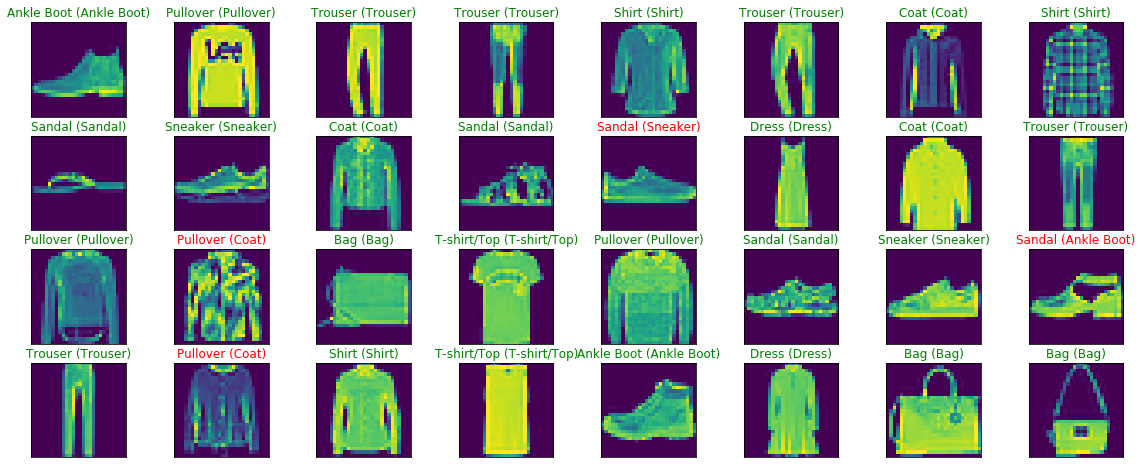

In [68]:
fig = plt.figure(figsize=(20,8))

for i in range(len(n)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[i].reshape(28,28)))
    pred_idx = final_preds[i]
    true_idx = y_test[i]
    ax.set_title("{} ({})".format(fashion_mnist_labels[pred_idx], fashion_mnist_labels[true_idx]), color=("green" if pred_idx == true_idx else "red"))